# Derivative operators

A multiwavelet basis representation of a function is by construction discontinuous at the boundary between two nodes, because basis functions have disjoint support and the representation is obtained by simple projection operators. Although this construction presents several advantages, it creates problems when derivatives are considered, because it is in principle a representation of the derivative operator does not exist.

The original construction {cite}`Alpert2002-sr` considers instead a derivative operator in the weak sense and provides a construction for such an operator, based either on its rescaling properties or on integration by parts.

Lately an an alternative approach has been investigated {cite}`Anderson2019-bx`. It relies on making use of an auxilliary basis where derivative operators have a formally valid definition. The multiwavelet expression of the operator is then obtained by transforming the function to the auxilliary basis representation, applying the (now well defined) derivative operator and the transforming back to a MW representation. In practice these operations are all performed at once, providing an alternative definition of the MW derivative. Two such representations have been investigated: one which makes use of b-splines as the auxilliary basis and one which instead makes use of band-limited exponentials.

In this exercise you will experiment with two different versions of the differential operator. The former, referred to as `ABGVDerivative` is the original representation, whereas the other (`BSDerivative`) makes use of b-splines as an auxilliary basis. In order to test the properties of the two different representation we will apply them on a smooth function (Gaussian) and a function with a cusp (Slater orbital)

1. Write four small functions, for a Gaussian $g(x) = e^{-(x-x_0)^2}$, a Slater-type orbital $s(x) = e^{-|x-x_0|}$ and their first derivatives
1. Construct two projectors (one at low pecision $\epsilon$ and one at higher precision $\epsilon/10$)
1. Construct the function tree at low precision for the Gaussian and the Slater functions, by projection
1. Construct the function tree at high precision both for the functions and their derivatives. We will use these as reference at some point 

In [7]:
from vampyr import vampyr1d as vp
import matplotlib.pyplot as plt
import numpy as np

epsilon = 1.0e-3
mra = vp.MultiResolutionAnalysis(box=[-8,8], order=5)
P_eps = vp.ScalingProjector(mra, prec=epsilon)
P_ref = vp.ScalingProjector(mra, prec=epsilon/10)

x0 = 0.0
def gauss(r):
    x = r[0]
    return np.exp(-(x-x0)**2)

def dgauss(r):
    x = r[0]
    return -2*(x-x0)*np.exp(-(x-x0)**2)

def slater(r):
    x = r[0]
    return np.exp(-abs(x-x0))

def dslater(r):
    x = r[0]
    sign = 1.0 if (x < x0) else -1.0
    return sign*np.exp(-abs(x-x0))

# Projecting Gaussian
g = P_eps(gauss)
g_ref = P_ref(gauss)
dg_ref = P_ref(dgauss)

# Projecting Slater
s = P_eps(slater)
s_ref = P_ref(slater)
ds_ref = P_ref(dslater)

Let's now check the precision obtained for the two functions by plotting the MW representations and their analytical counterparts.
The error can be plotted by taking the difference between the MW representation and the original function: $d(x)=P_\epsilon g(x) - g(x)$

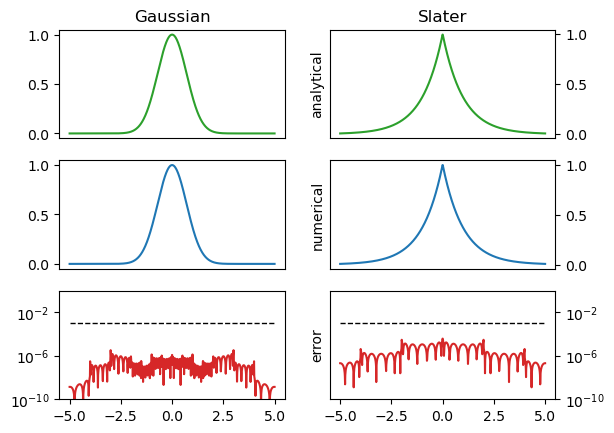

In [2]:
x_vec = np.linspace(-5, 5, 1000)
fig, ax = plt.subplots(3,2)
yrange = [epsilon*1e-7, epsilon*1e3]

ax[0,0].plot(x_vec, np.array([gauss([x]) for x in x_vec ]), "tab:green")
ax[0,0].set_title('Gaussian')
ax[0,0].tick_params(axis='x', bottom=False, labelbottom=False)
ax[1,0].plot(x_vec, np.array([g([x]) for x in x_vec ]), "tab:blue")
ax[1,0].tick_params(axis='x', bottom=False, labelbottom=False)
ax[2,0].plot(x_vec, np.array([abs(g([x])-gauss([x])) for x in x_vec ]), "tab:red")
ax[2,0].set_ylim(yrange)
ax[2,0].set_yscale('log')
ax[2,0].hlines(y=epsilon, xmin=-5, xmax=5, colors='black', linestyles='--', lw=1, label='precision')

ax[0,1].plot(x_vec, np.array([slater([x]) for x in x_vec ]), "tab:green")
ax[0,1].set_title('Slater')
ax[0,1].tick_params(axis='y', left=False, labelleft=False, labelright=True, right=True)
ax[0,1].tick_params(axis='x', bottom=False, labelbottom=False)
ax[1,1].plot(x_vec, np.array([s([x]) for x in x_vec ]), "tab:blue")
ax[1,1].tick_params(axis='y', left=False, labelleft=False, labelright=True, right=True)
ax[1,1].tick_params(axis='x', bottom=False, labelbottom=False)
ax[2,1].plot(x_vec, np.array([abs(s([x])-slater([x])) for x in x_vec ]), "tab:red")
ax[2,1].tick_params(axis='y', left=False, labelleft=False, labelright=True, right=True)
ax[2,1].set_ylim(yrange)
ax[2,1].set_yscale('log')
ax[2,1].hlines(y=epsilon, xmin=-5, xmax=5, colors='black', linestyles='--', lw=1, label='precision')

ax[0,1].set_ylabel('analytical')
ax[1,1].set_ylabel('numerical')
ax[2,1].set_ylabel('error')
plt.show()

You can now compute the derivatives by applying the two different operators. By making use of the reference derivatives (the high precision representations obtained by projection of the *analytical* derivatives) we can then evaluate the norm of the error commited using the two different operators in the two different bases.

1. Take the difference between the low-precision derivative obtained by application of the derivative operator and the refernce derivative computed above: $d(x) = D(P_\epsilon g(x)) - P_{\epsilon/10} dg(x)/dx$
2. Print the norm of the resulting function tree by calling the `.norm()` method.

Questions:

1. Which derivative operator is more precise for the Gaussian function?
1. Which one is more precise for the slater function?

In [3]:
D_abgv = vp.ABGVDerivative(mra, 0.5, 0.5)
D_bspline = vp.BSDerivative(mra)

dg_abgv = D_abgv(g)
dg_bspline = D_bspline(g)

print('\nGaussian error norms:')
print('ABGV    :', (dg_abgv - dg_ref).norm())
print('BSpline :', (dg_bspline - dg_ref).norm())

ds_abgv = D_abgv(s)
ds_bspline = D_bspline(s)

print('\nSlater error norms:')
print('ABGV    :', (ds_abgv - ds_ref).norm())
print('BSpline :', (ds_bspline - ds_ref).norm())


Gaussian error norms:
ABGV    : 4.5632708939018065e-05
BSpline : 1.236147199835725e-05

Slater error norms:
ABGV    : 0.0010552628854507572
BSpline : 0.44976732156010835


In order to investigate the reason for the precision achieved by the two different derivative operators, it is convenient to plot both the derivatives computed by application of the operators and thir respective pointwise error, rather than looking at the norm of the error.

For both functions (Gaussian and Slater):

1. Plot the analytical derivative
1. Plot the derivative computed with the two operators
1. Plot the error with respect to the analytical derivative as $d(x) = D(P_\epsilon g(x)) - dg(x)/dx$

Questions:
1. How does the derivative obtained by operator application look like for the fur different cases (two operators, two functions)?
1. For the Gaussian function, which operator gives a lower error?
1. For the Slater function, which operator gives a lower error?
1. Can you rationalize the observed results in light of the difference in the way the two operators are constructed?


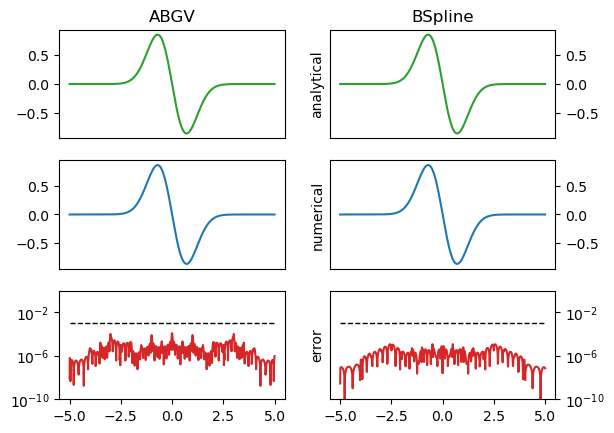

In [4]:
x_vec = np.linspace(-5, 5, 1000)
fig, ax = plt.subplots(3,2)
yrange = [epsilon*1e-7, epsilon*1e3]

ax[0,0].plot(x_vec, np.array([dgauss([x]) for x in x_vec ]), "tab:green")
ax[0,0].set_title('ABGV')
ax[0,0].tick_params(axis='x', bottom=False, labelbottom=False)
ax[1,0].plot(x_vec, np.array([dg_abgv([x]) for x in x_vec ]), "tab:blue")
ax[1,0].tick_params(axis='x', bottom=False, labelbottom=False)
ax[2,0].plot(x_vec, np.array([abs(dg_abgv([x])-dgauss([x])) for x in x_vec ]), "tab:red")
ax[2,0].set_ylim(yrange)
ax[2,0].set_yscale('log')
ax[2,0].hlines(y=epsilon, xmin=-5, xmax=5, colors='black', linestyles='--', lw=1, label='precision')

ax[0,1].plot(x_vec, np.array([dgauss([x]) for x in x_vec ]), "tab:green")
ax[0,1].set_title('BSpline')
ax[0,1].tick_params(axis='y', left=False, labelleft=False, labelright=True, right=True)
ax[0,1].tick_params(axis='x', bottom=False, labelbottom=False)
ax[1,1].plot(x_vec, np.array([dg_bspline([x]) for x in x_vec ]), "tab:blue")
ax[1,1].tick_params(axis='y', left=False, labelleft=False, labelright=True, right=True)
ax[1,1].tick_params(axis='x', bottom=False, labelbottom=False)
ax[2,1].plot(x_vec, np.array([abs(dg_bspline([x])-dgauss([x])) for x in x_vec ]), "tab:red")
ax[2,1].tick_params(axis='y', left=False, labelleft=False, labelright=True, right=True)
ax[2,1].set_ylim(yrange)
ax[2,1].set_yscale('log')
ax[2,1].hlines(y=epsilon, xmin=-5, xmax=5, colors='black', linestyles='--', lw=1, label='precision')

ax[0,1].set_ylabel('analytical')
ax[1,1].set_ylabel('numerical')
ax[2,1].set_ylabel('error')
plt.show()

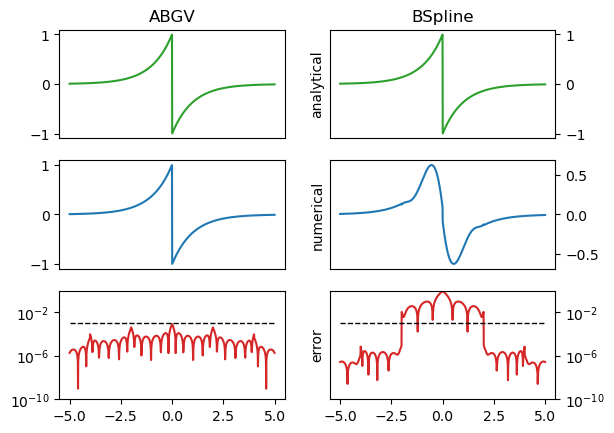

In [5]:
x_vec = np.linspace(-5, 5, 1000)
fig, ax = plt.subplots(3,2)
yrange = [epsilon*1e-7, epsilon*1e3]

ax[0,0].plot(x_vec, np.array([dslater([x]) for x in x_vec ]), "tab:green")
ax[0,0].set_title('ABGV')
ax[0,0].tick_params(axis='x', bottom=False, labelbottom=False)
ax[1,0].plot(x_vec, np.array([ds_abgv([x]) for x in x_vec ]), "tab:blue")
ax[1,0].tick_params(axis='x', bottom=False, labelbottom=False)
ax[2,0].plot(x_vec, np.array([abs(ds_abgv([x])-dslater([x])) for x in x_vec ]), "tab:red")
ax[2,0].set_ylim(yrange)
ax[2,0].set_yscale('log')
ax[2,0].hlines(y=epsilon, xmin=-5, xmax=5, colors='black', linestyles='--', lw=1, label='precision')

ax[0,1].plot(x_vec, np.array([dslater([x]) for x in x_vec ]), "tab:green")
ax[0,1].set_title('BSpline')
ax[0,1].tick_params(axis='y', left=False, labelleft=False, labelright=True, right=True)
ax[0,1].tick_params(axis='x', bottom=False, labelbottom=False)
ax[1,1].plot(x_vec, np.array([ds_bspline([x]) for x in x_vec ]), "tab:blue")
ax[1,1].tick_params(axis='y', left=False, labelleft=False, labelright=True, right=True)
ax[1,1].tick_params(axis='x', bottom=False, labelbottom=False)
ax[2,1].plot(x_vec, np.array([abs(ds_bspline([x])-dslater([x])) for x in x_vec ]), "tab:red")
ax[2,1].tick_params(axis='y', left=False, labelleft=False, labelright=True, right=True)
ax[2,1].set_ylim(yrange)
ax[2,1].set_yscale('log')
ax[2,1].hlines(y=epsilon, xmin=-5, xmax=5, colors='black', linestyles='--', lw=1, label='precision')

ax[0,1].set_ylabel('analytical')
ax[1,1].set_ylabel('numerical')
ax[2,1].set_ylabel('error')
plt.show()

Bonus exercises:

1. The example above was purposedly **extreme**, because the Slater function has a cusp which coincides with the first dyadic subdivision in a MW representation. Try to move the cusp slightly to offset it, and see how that affects the result.
1. A stringent test to verify the accuracy of a representation of a differential operator is to check the result of the commutator between the operator and its pseudoinverse (its Green's funcion). For example, in 3d, the inverse of the Laplacian $L = \nabla^2$ is the Poisson kernel $P=1/r$. Their commutator $[T,P]$ should ideally give zero as a result, when applied onto a smooth function.

{bibliography}